Speed graph

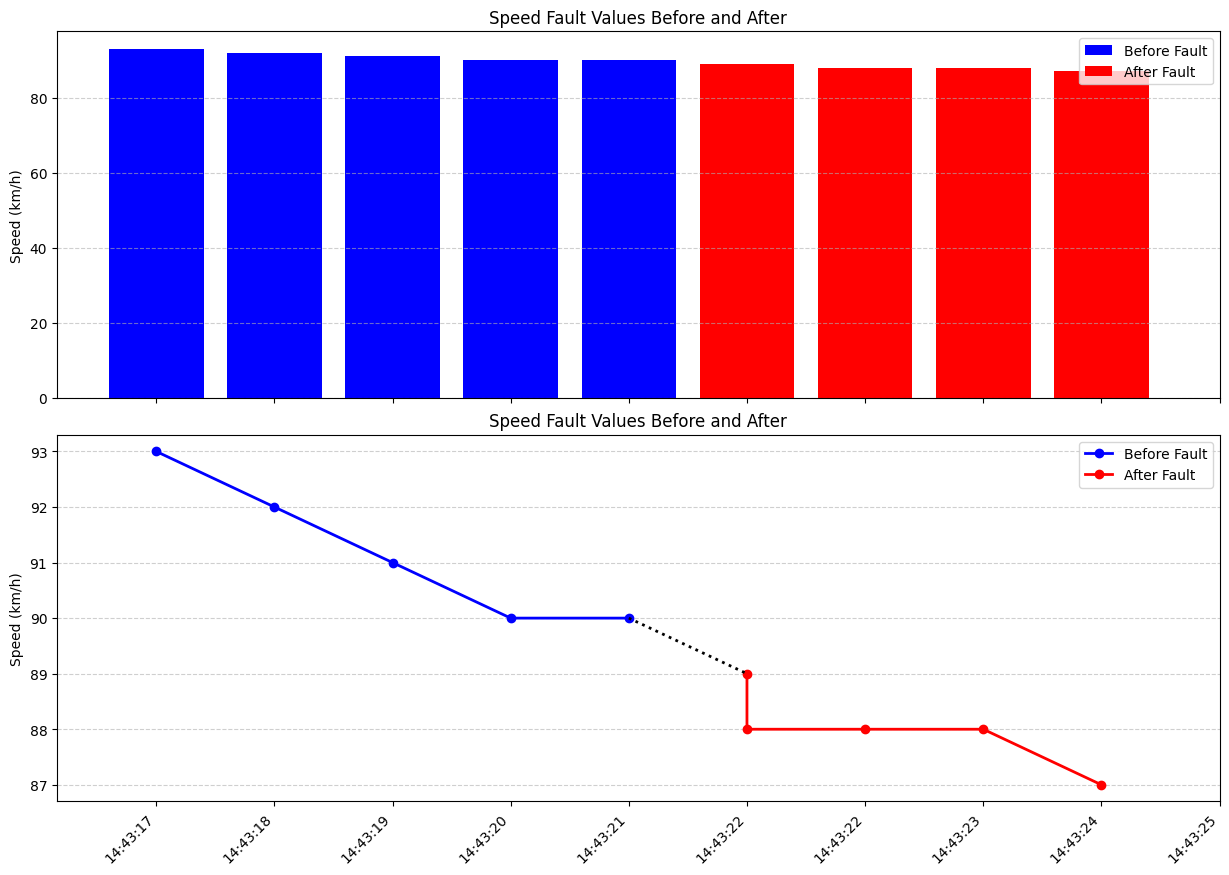

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os


file_path = os.path.join(os.getcwd(), "fault_data.xlsx")
df = pd.read_excel(file_path, engine='openpyxl')
# df = pd.read_excel(file_path, engine='xlrd')   didnt work

#  speed (km/h) values
before_fault = df.iloc[4, 2:7].values
after_fault = df.iloc[4, 7:12].values


raw_timeline = pd.to_datetime(df.iloc[2, 2:12].dropna().astype(str)).dt.strftime('%H:%M:%S').values

# make before_fault and after_fault match timeline length
timeline_before = raw_timeline[:len(before_fault)]
timeline_after = raw_timeline[len(before_fault):]

#Bar and Line Graphs
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True, gridspec_kw={'hspace': 0.1})

# bargraph
axes[0].bar(timeline_before, before_fault, color='blue', label='Before Fault')
axes[0].bar(timeline_after, after_fault, color='red', label='After Fault')
axes[0].set_ylabel("Speed (km/h)")
axes[0].set_title("Speed Fault Values Before and After")
axes[0].legend()
axes[0].grid(axis='y', linestyle="--", alpha=0.6)

# linegraph
axes[1].plot(timeline_before, before_fault, color='blue', marker='o', linestyle='-', linewidth=2, label='Before Fault')
axes[1].plot(timeline_after, after_fault, color='red', marker='o', linestyle='-', linewidth=2, label='After Fault')

# black line
axes[1].plot([timeline_before[-1], timeline_after[0]], [before_fault[-1], after_fault[0]], color='black', linestyle=':', linewidth=2)

axes[1].set_ylabel("Speed (km/h)")
axes[1].set_title("Speed Fault Values Before and After")
axes[1].legend()
axes[1].grid(axis='y', linestyle="--", alpha=0.6)

#timeline as x-axis labels
axes[1].set_xticks(range(len(raw_timeline)))
axes[1].set_xticklabels(raw_timeline, rotation=45, ha='right')

plt.show()


acceleration

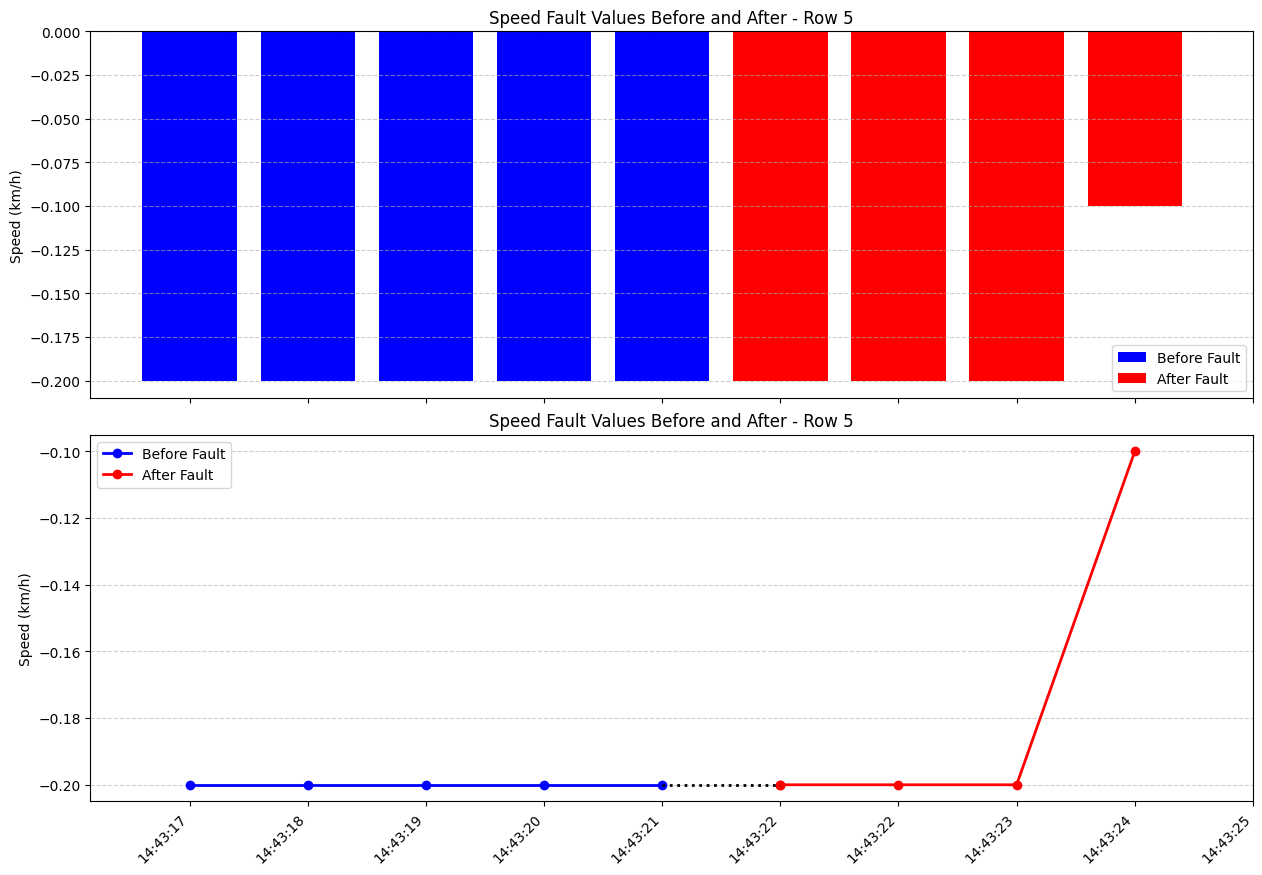

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import ipywidgets as widgets
from IPython.display import display

file_path = os.path.join(os.getcwd(), "fault_data.xlsx")
df = pd.read_excel(file_path, engine='openpyxl')

# Function to update the graph based on selected row
def plot_graph(selected_row):
    before_fault = df.iloc[selected_row, 2:7].values
    after_fault = df.iloc[selected_row, 7:12].values

    raw_timeline = pd.to_datetime(df.iloc[2, 2:12].dropna().astype(str)).dt.strftime('%H:%M:%S').values

    timeline_before = raw_timeline[:len(before_fault)]
    timeline_after = raw_timeline[len(before_fault):]

    fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True, gridspec_kw={'hspace': 0.1})

    # --- Bar Graph ---
    axes[0].bar(timeline_before, before_fault, color='blue', label='Before Fault')
    axes[0].bar(timeline_after, after_fault, color='red', label='After Fault')
    axes[0].set_ylabel("Speed (km/h)")
    axes[0].set_title(f"Speed Fault Values Before and After - Row {selected_row}")
    axes[0].legend()
    axes[0].grid(axis='y', linestyle="--", alpha=0.6)

    # --- Line Graph ---
    axes[1].plot(timeline_before, before_fault, color='blue', marker='o', linestyle='-', linewidth=2, label='Before Fault')
    axes[1].plot(timeline_after, after_fault, color='red', marker='o', linestyle='-', linewidth=2, label='After Fault')

    # Black line
    axes[1].plot([timeline_before[-1], timeline_after[0]], [before_fault[-1], after_fault[0]], color='black', linestyle=':', linewidth=2)

    axes[1].set_ylabel("Speed (km/h)")
    axes[1].set_title(f"Speed Fault Values Before and After - Row {selected_row}")
    axes[1].legend()
    axes[1].grid(axis='y', linestyle="--", alpha=0.6)

    axes[1].set_xticks(range(len(raw_timeline)))
    axes[1].set_xticklabels(raw_timeline, rotation=45, ha='right')

    plt.show()

# Create a dropdown widget for selecting row number
row_selector = widgets.IntSlider(value=5, min=4, max=10, step=1, description='Row:', continuous_update=False)
row_selector.observe(lambda change: plot_graph(change['new']), names='value')

# Use VBox to place the slider above the plot
display(widgets.VBox([row_selector]))

# Display the initial plot
plot_graph(row_selector.value)
